In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_combined = pd.read_csv('/content/drive/MyDrive/DATOS PROTECTO SEGUNDO PARCIAL/dataset-limpio.csv')

# **LIMPIEZA DE DATOS**

In [ ]:
df_combined.fillna('', inplace=True)

<ipython-input-3-752f617918ee>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_combined.fillna('', inplace=True)


In [ ]:
df_combined.head(60)

,Source,title,doi,abstract,keywords,Year,Source title,Funding Details,References,Affiliations,Correspondence Address,Authors,Cited by,Editors,Publisher,Sponsors,Abbreviated Source Title,Document Type,Publication Stage,number
0,Scopus,explaining nonadoption blockchain technology g...,10.1007/s40812-023-00296-8,business potential blockchain technology globa...,blockchain d21 d22 f23 general purpose technol...,2024,journal industrial business economics,,annals transaction cost theory past progress c...,fhnw school business university applied scienc...,jp lindeque fhnw school business university ap...,hubenova lindeque jp peter mk,0.0,,springer nature,,j ind bus econ,article,final,
1,Scopus,smartcircular strategies managing biomass reso...,10.1016/j.enconman.2024.118690,growing global population need sustainable ene...,biomass management challenges cifdematel cifqf...,2024,energy conversion management,,feleke cole sm sekabira h djouaka r manyong v ...,management department faculty economics manage...,alimohammadlou management department faculty e...,alinejad alimohammadlou abbasi mirghaderi sh,0.0,,elsevier ltd,,energy convers manage,article,final,
2,Scopus,blockchain urban governance enhancing trust sm...,10.1016/j.scs.2024.105438,rapid urbanization increasing energy demands n...,blockchain long shortterm memory smart cities ...,2024,sustainable cities society,,ahad paiva tripathi g feroz n enabling technol...,college building environment engineering zheng...,x zhu college building environment engineering...,zhu x chen z cheng yang c wu wu wang h,0.0,,elsevier ltd,,sustainable cities soc,article,final,
3,Scopus,data mesh meets blockchain,10.1007/s44196-024-00404-z,effective dataset management crucial enterpris...,blockchain data mesh dataset governance datase...,2024,international journal computational intelligen...,king saud university ksu,halevy korn f noy nf olston c polyzotis n roy ...,department information systems college compute...,almaslukh department information systems colle...,almaslukh alameer alsaleh h alkadyan f allheei...,0.0,,springer science business media bv,,int j comput intell syst,article,final,
4,Scopus,wise investment urban governments evidence int...,10.1016/j.asieco.2024.101730,pursuit sustainable development goals become i...,community sports centers intelligent buildings...,2024,journal asian economics,ministry science technology taiwan 1102410h007...,agha n rascher economic development effects ma...,department quantitative finance national tsing...,ic tsai department quantitative finance nation...,tsai ic,0.0,,elsevier bv,,j asian econ,article,final,
5,Scopus,digitalising governance processes water resour...,10.1016/j.envsci.2024.103805,water become scarce resource semiarid regions ...,climate change digitalisation mediterranean ag...,2024,environmental science policy,european commission ec,ahmed n de hussain internet things iot smart p...,department information communication engineeri...,b yazici department project development implem...,argente garca je yazici b richa touil richart ...,0.0,,elsevier ltd,,environ sci policy,article,final,
6,Scopus,taking climatesmart governance high seas,10.1126/science.adp4379,comprehensive spatial planning international w...,climate change conservation natural resources ...,2024,science,john fell fund university oxford foundation fo...,agreement united nations convention law sea co...,department animal biology faculdade de cincias...,,santos cf agardy brooks c gjerde km payne c we...,0.0,,american association advancement science,,sci,article,final,
7,Scopus,csr smart city progress proposed model urban d...,10.1007/s12076-023-00367-3,urban areas experiencing rapid increase popula...,corporate social responsibility publicprivate ...,2024,letters spatial resource sciences,,abdelrazek sa governance sdgs smart cities con...,faculty management gati shakti vishwavidyalaya...,k singh faculty management gati shakti vishwav...,singh k kolar p nanduri seetha ram v kumar,0.0,,sp

In [ ]:
# Convertir la columna 'Year' a datetime (solo si no está ya en formato correcto)
df_combined['Year'] = pd.to_datetime(df_combined['Year'], format='%Y', errors='coerce')
df_combined['Year'] = df_combined['Year'].dt.year

In [ ]:
# Crear una columna 'year' para agrupar por año
df_combined['year'] = df_combined['Year']

# Contar las publicaciones por año y fuente
publications_by_year = df_combined.groupby(['year', 'Source']).size().reset_index(name='Count')

# **Análisis Exploratorio**

**Gráfico de Tendencias Temporales por Fuente Scopus y Science Direct**

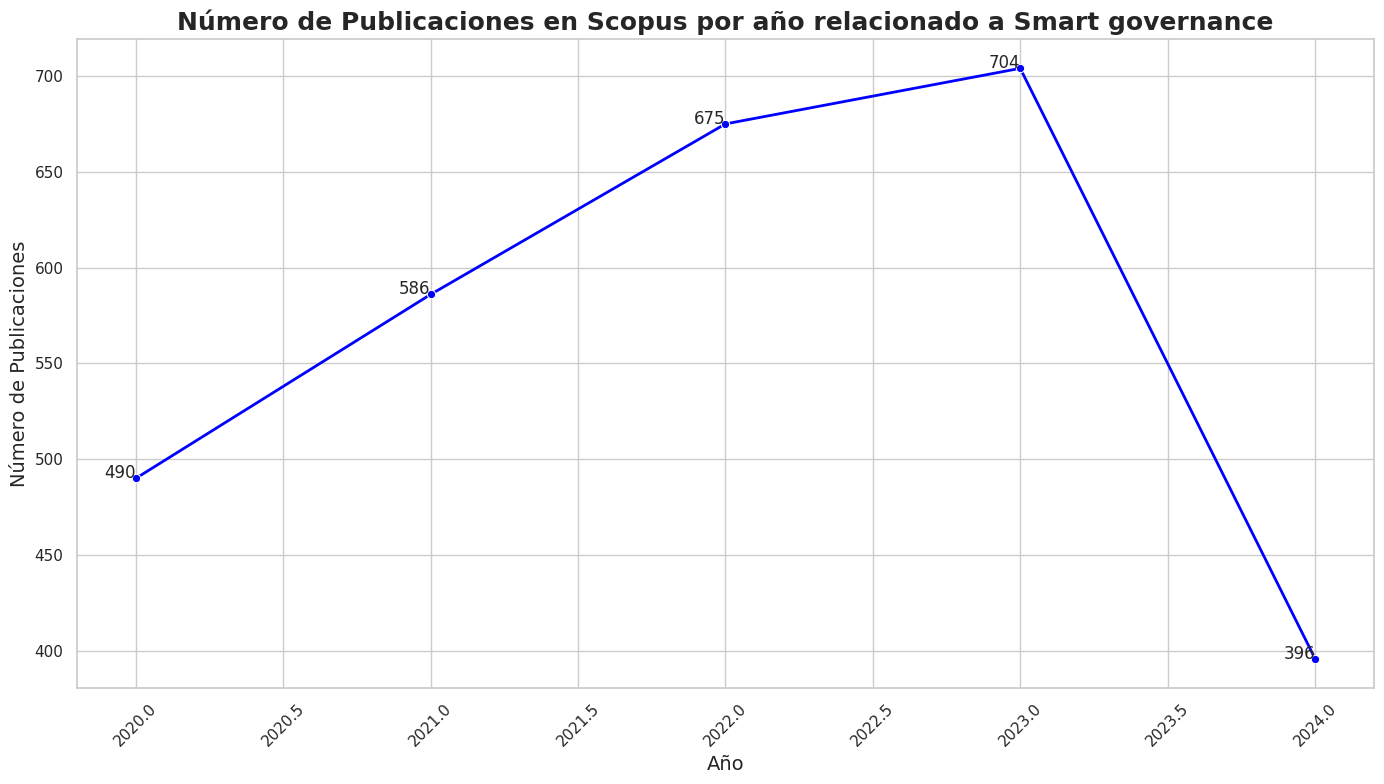

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar datos para Scopus
scopus_data = publications_by_year[publications_by_year['Source'] == 'Scopus']

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar la secuencia de tiempo por año como gráfico de líneas
sns.lineplot(x='year', y='Count', data=scopus_data, ax=ax, marker='o', color='blue', linewidth=2)

# Configurar el título y las etiquetas
plt.title('Número de Publicaciones en Scopus por año relacionado a Smart governance', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)

# Mostrar los valores numéricos en los puntos del gráfico
for i in range(len(scopus_data)):
    plt.text(scopus_data['year'].iloc[i], scopus_data['Count'].iloc[i],
             scopus_data['Count'].iloc[i], fontsize=12, ha='right')

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


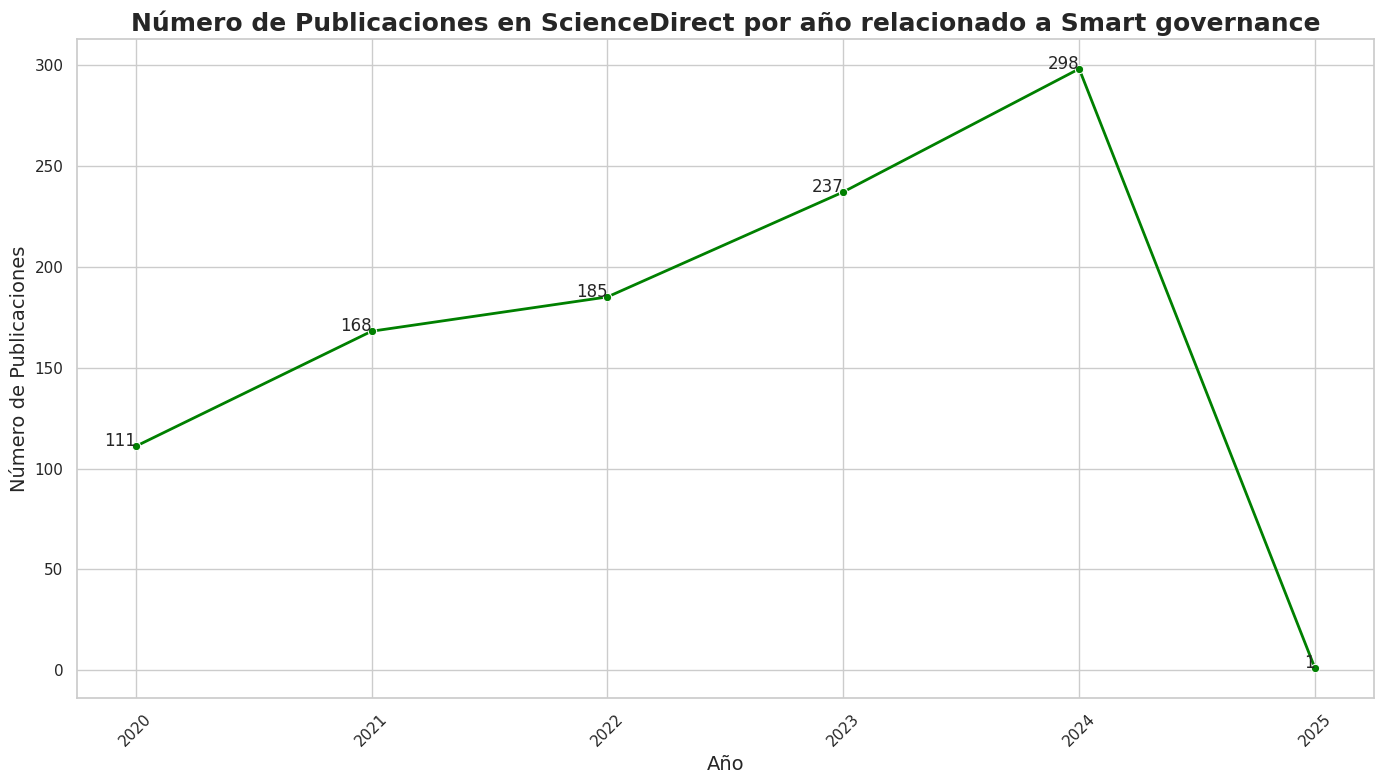

In [ ]:
# Filtrar datos para ScienceDirect
sciencedirect_data = publications_by_year[publications_by_year['Source'] == 'ScienceDirect']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar la secuencia de tiempo por año como gráfico de líneas
sns.lineplot(x='year', y='Count', data=sciencedirect_data, ax=ax, marker='o', color='green', linewidth=2)

# Configurar el título y las etiquetas
plt.title('Número de Publicaciones en ScienceDirect por año relacionado a Smart governance', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)

# Mostrar los valores numéricos en los puntos del gráfico
for i in range(len(sciencedirect_data)):
    plt.text(sciencedirect_data['year'].iloc[i], sciencedirect_data['Count'].iloc[i],
             sciencedirect_data['Count'].iloc[i], fontsize=12, ha='right')

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<ipython-input-9-682890b9bb6e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source', y='Count', data=publications_count, palette=['green', 'blue'])


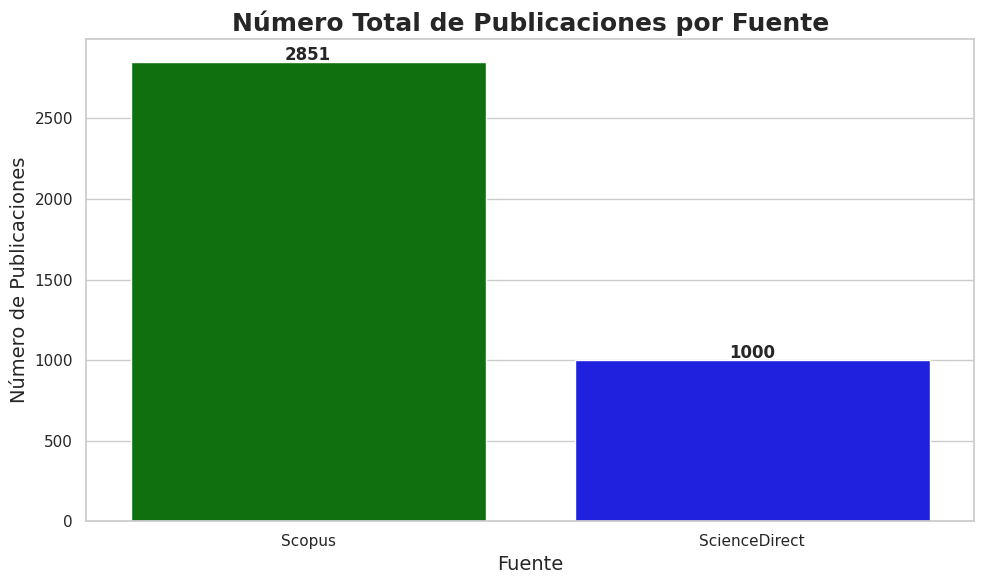

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Contar el número de publicaciones por fuente
publications_count = df_combined['Source'].value_counts().reset_index()
publications_count.columns = ['Source', 'Count']

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el histograma
sns.barplot(x='Source', y='Count', data=publications_count, palette=['green', 'blue'])

# Configurar el título y las etiquetas
plt.title('Número Total de Publicaciones por Fuente', fontsize=18, fontweight='bold')
plt.xlabel('Fuente', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)

# Mostrar los valores numéricos encima de las barras
for i in range(len(publications_count)):
    plt.text(i, publications_count['Count'].iloc[i] + 10, publications_count['Count'].iloc[i],
             ha='center', fontsize=12, fontweight='bold')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


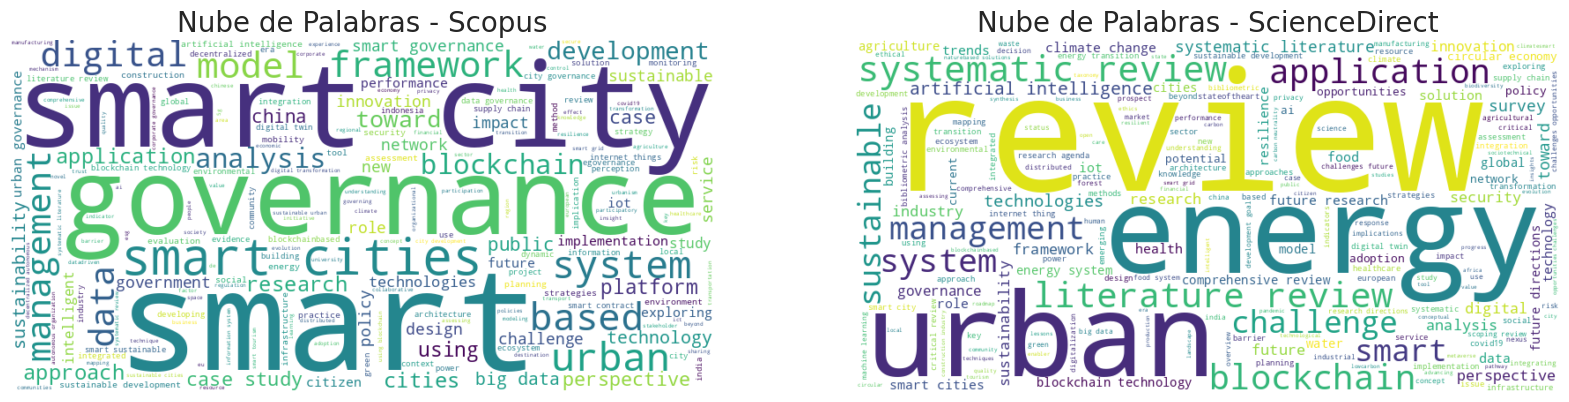

In [ ]:
import re
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

# Preprocesamiento del texto
def preprocess_text(text):
    # Eliminar caracteres especiales y convertir a minúsculas
    text = ''.join([char for char in text if char not in string.punctuation])
    text = text.lower()
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Crear un solo string con todo el texto para cada fuente
text_scopus = ' '.join(df_combined[df_combined['Source'] == 'Scopus']['title'].dropna().apply(preprocess_text))
text_sciencedirect = ' '.join(df_combined[df_combined['Source'] == 'ScienceDirect']['title'].dropna().apply(preprocess_text))

# Crear las nubes de palabras
wordcloud_scopus = WordCloud(width=800, height=400, background_color='white').generate(text_scopus)
wordcloud_sciencedirect = WordCloud(width=800, height=400, background_color='white').generate(text_sciencedirect)

# Plotear las nubes de palabras
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(wordcloud_scopus, interpolation='bilinear')
axes[0].set_title('Nube de Palabras - Scopus', fontsize=20)
axes[0].axis('off')

axes[1].imshow(wordcloud_sciencedirect, interpolation='bilinear')
axes[1].set_title('Nube de Palabras - ScienceDirect', fontsize=20)
axes[1].axis('off')

plt.show()


# **Análisis Univariado**

**Distribución de documentos por año**

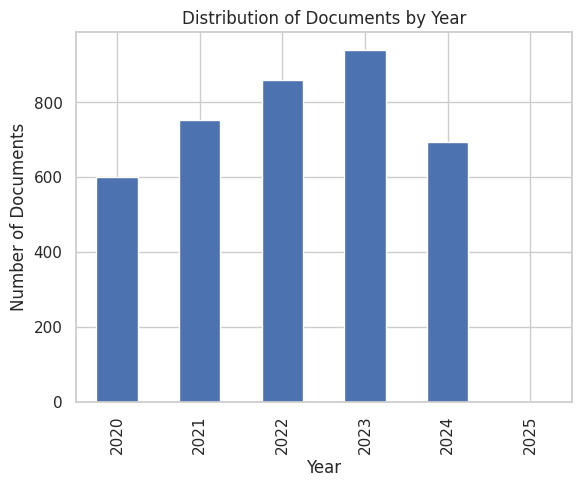

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'df' es tu DataFrame

# Análisis Univariado
# Distribución de documentos por año
df_combined['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents by Year')
plt.show()

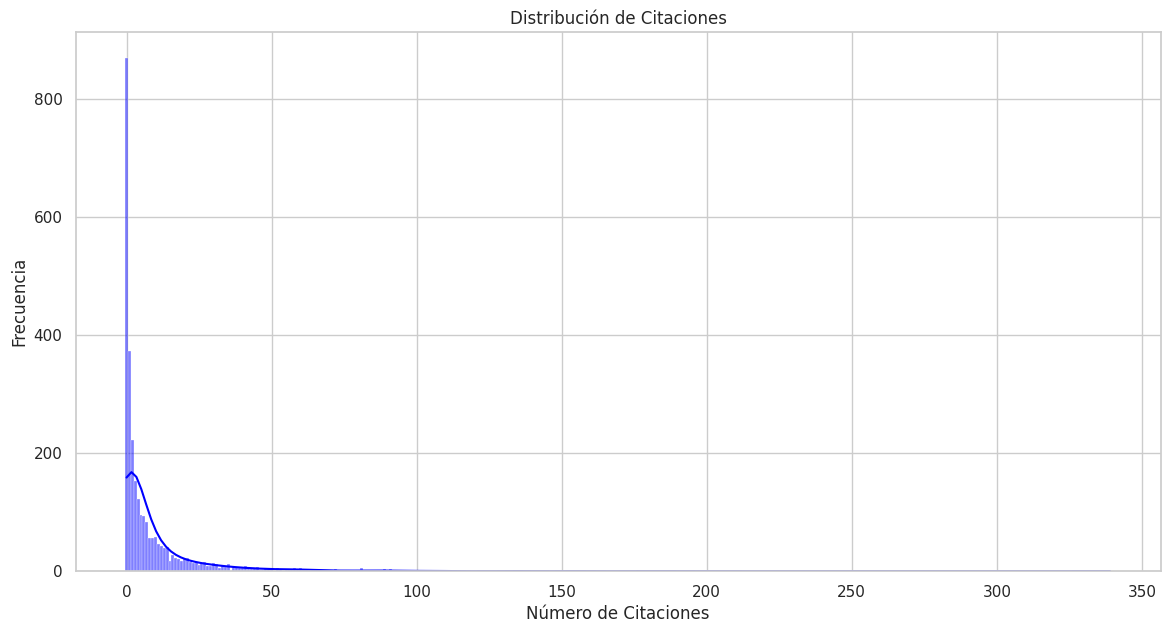

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")


plt.figure(figsize=(14, 7))
sns.histplot(df_combined['Cited by'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribución de Citaciones')
plt.xlabel('Número de Citaciones')
plt.ylabel('Frecuencia')
plt.show()




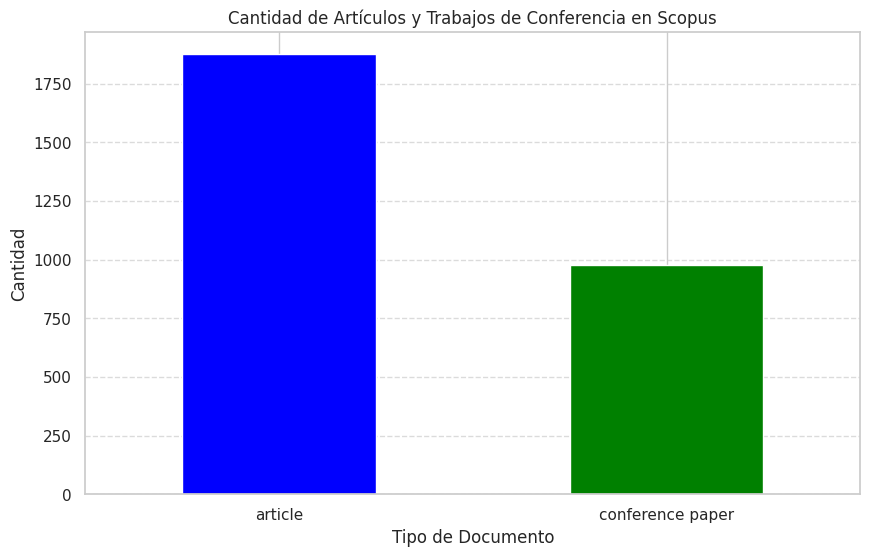

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df_combined cargado

# Filtrar el dataset para obtener solo los datos de Scopus (si hay una columna que identifique la fuente de Scopus)
# Aquí asumimos que 'Source' es la columna que identifica la fuente y que su valor para Scopus es 'Scopus'
df_scopus = df_combined[df_combined['Source'] == 'Scopus']

# Contar la cantidad de cada tipo de documento
document_counts = df_scopus['Document Type'].value_counts()

# Filtrar solo los tipos de documento 'article' y 'conference paper'
document_counts_filtered = document_counts[document_counts.index.isin(['article', 'conference paper'])]

# Crear el gráfico histográfico
plt.figure(figsize=(10, 6))
document_counts_filtered.plot(kind='bar', color=['blue', 'green'])
plt.title('Cantidad de Artículos y Trabajos de Conferencia en Scopus')
plt.xlabel('Tipo de Documento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Análisis Bivariado**

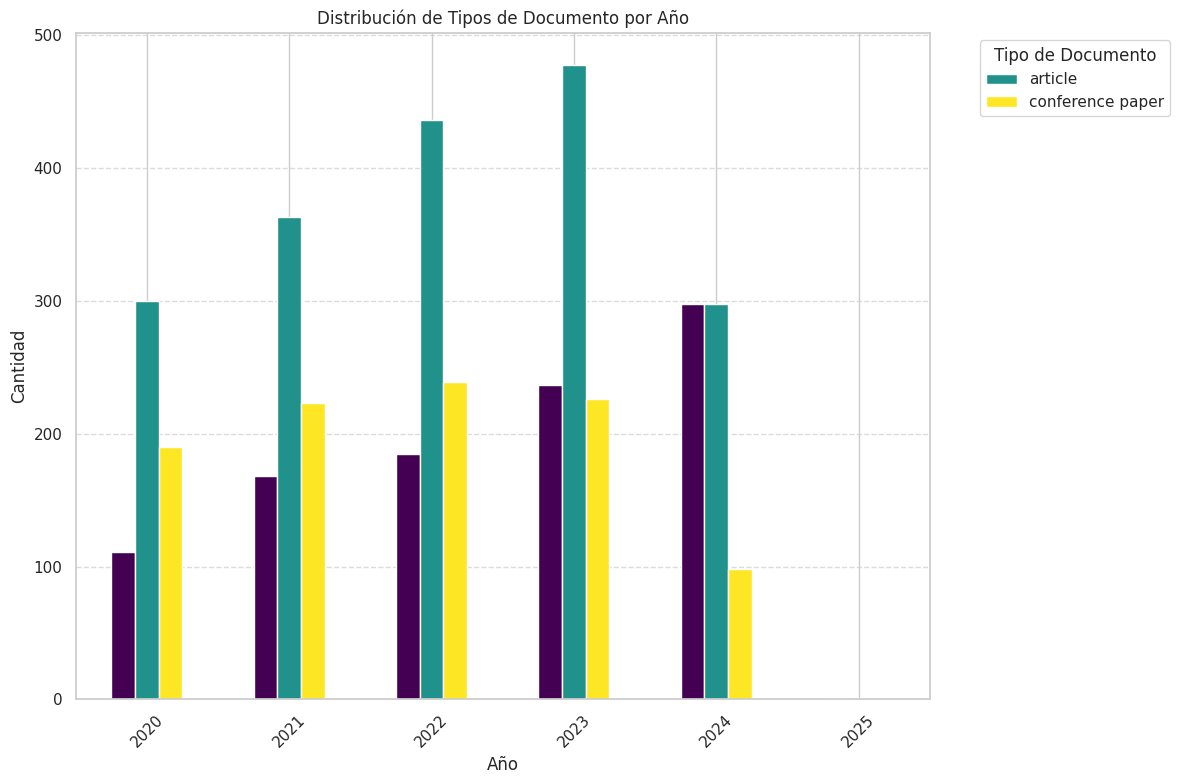

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


contingency_table = pd.crosstab(df_combined['Year'], df_combined['Document Type'])


contingency_table.plot(kind='bar', figsize=(12, 8), colormap='viridis')

plt.title('Distribución de Tipos de Documento por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Documento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-15-7759a477dff4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Document Type', y='Cited by', data=df_combined, palette='viridis')


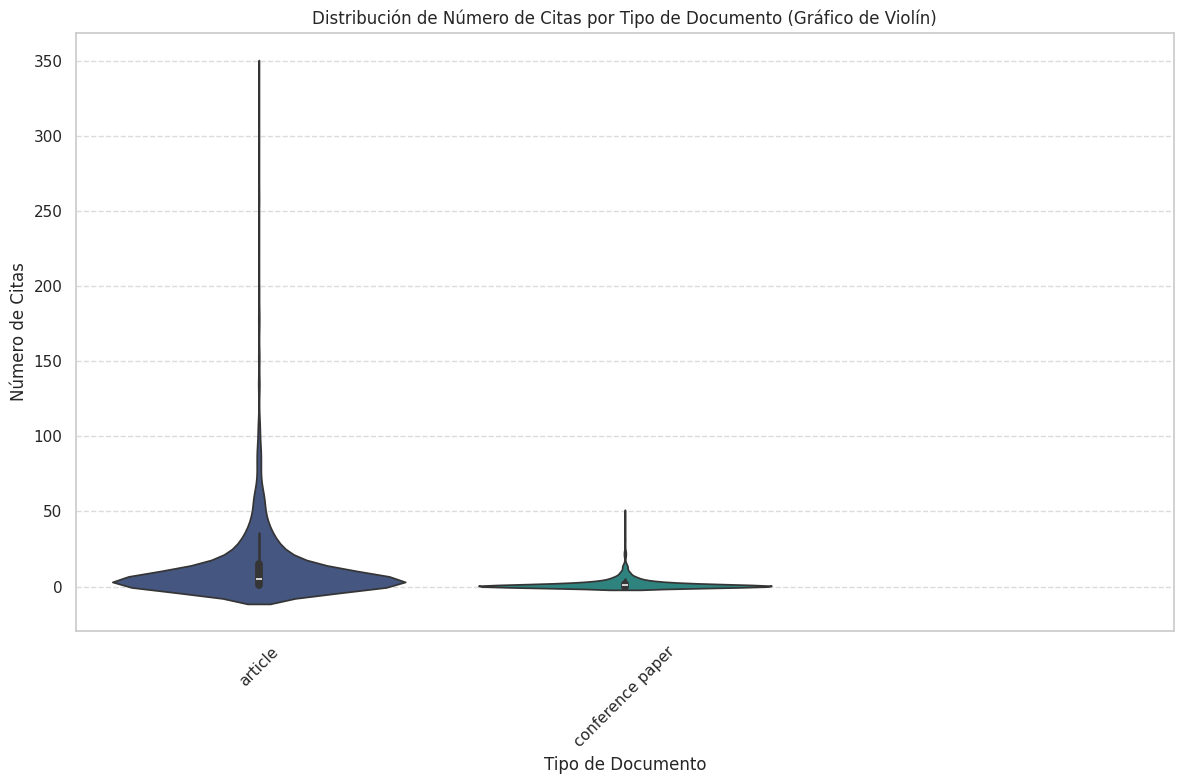

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que los datos sean numéricos
df_combined['Cited by'] = pd.to_numeric(df_combined['Cited by'], errors='coerce')

# Crear el gráfico de violín
plt.figure(figsize=(12, 8))
sns.violinplot(x='Document Type', y='Cited by', data=df_combined, palette='viridis')
plt.title('Distribución de Número de Citas por Tipo de Documento (Gráfico de Violín)')
plt.xlabel('Tipo de Documento')
plt.ylabel('Número de Citas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-16-9e183ca166d3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Cited by', data=df_combined, palette='viridis')


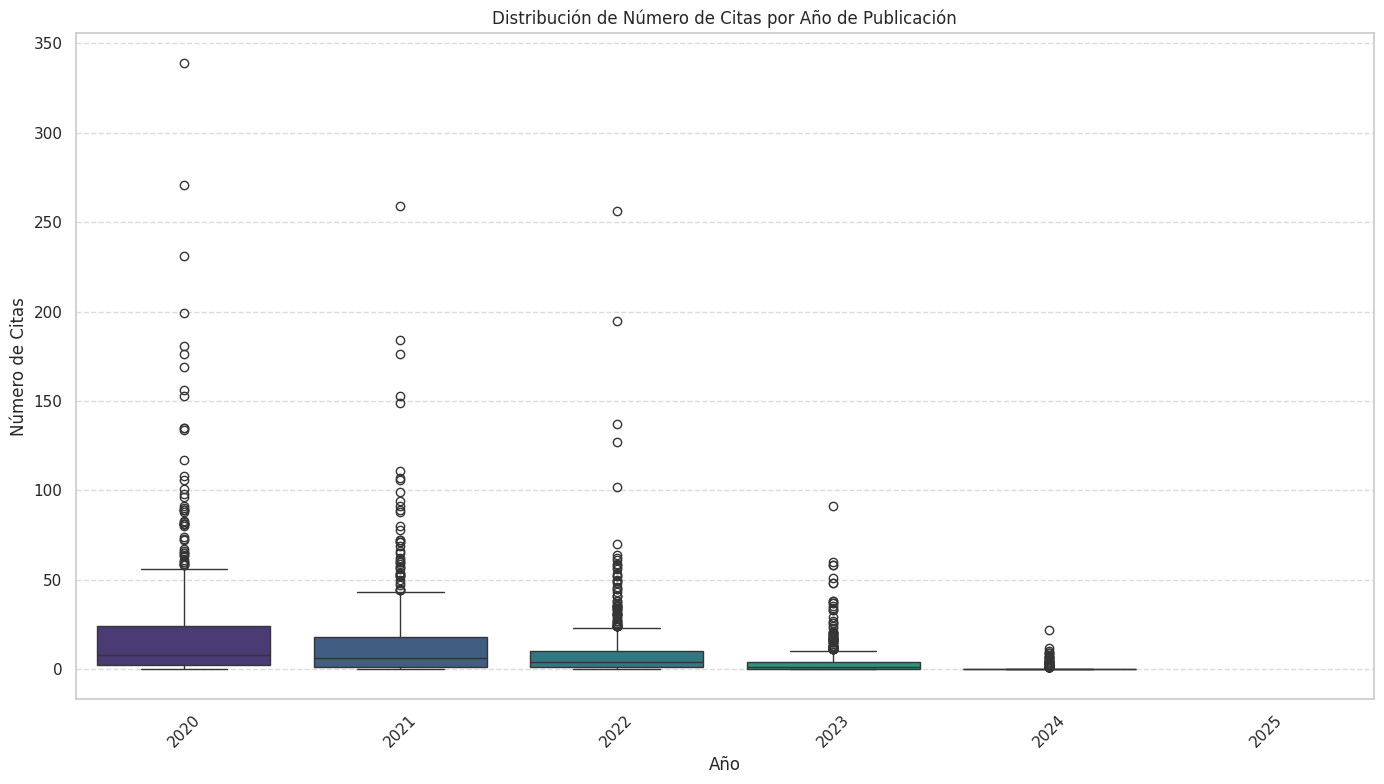

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que los datos sean numéricos
df_combined['Cited by'] = pd.to_numeric(df_combined['Cited by'], errors='coerce')

# Crear el gráfico de caja
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Cited by', data=df_combined, palette='viridis')
plt.title('Distribución de Número de Citas por Año de Publicación')
plt.xlabel('Año')
plt.ylabel('Número de Citas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


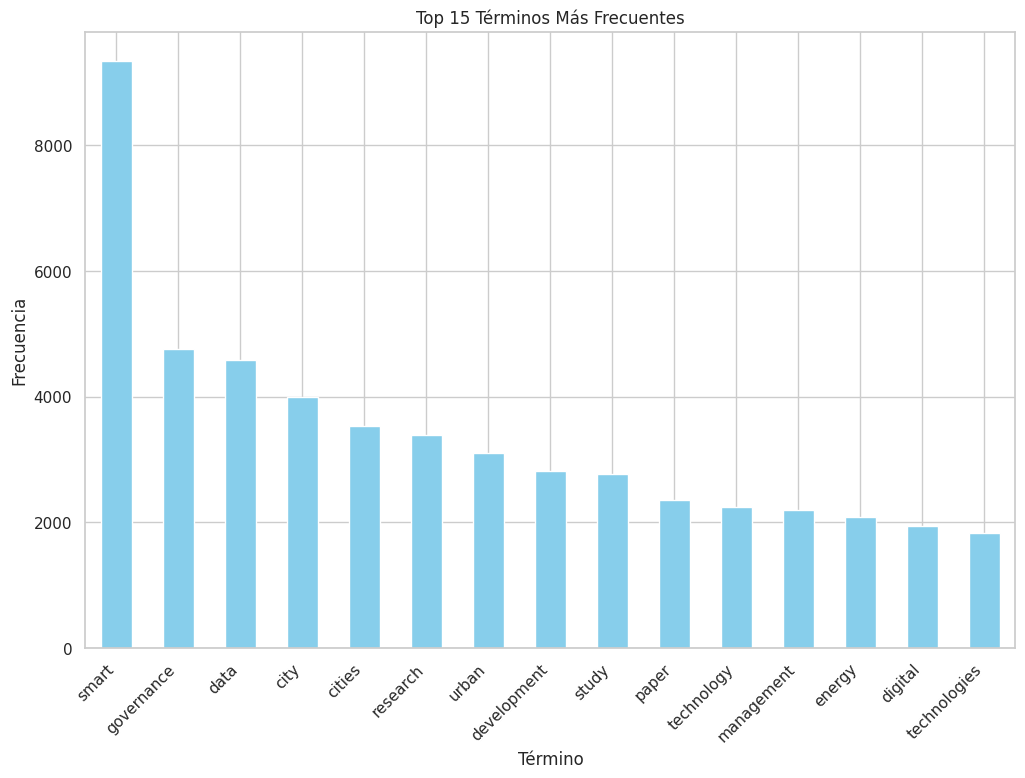

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Unir todos los textos en una sola cadena
text = ' '.join(df_combined['abstract'].dropna())  # Puedes usar otra columna si prefieres

# Configurar el vectorizador para extraer términos
vectorizer = CountVectorizer(stop_words='english')  # Usa 'english' en lugar de STOPWORDS
X = vectorizer.fit_transform([text])
word_freq = X.sum(axis=0)
terms = vectorizer.get_feature_names_out()

# Crear un DataFrame con los términos y sus frecuencias
df_terms = pd.DataFrame(word_freq.T, index=terms, columns=['Frequency'])
df_terms = df_terms.sort_values(by='Frequency', ascending=False)

# Seleccionar los 15 términos más frecuentes
top_terms = df_terms.head(15)

# Crear el gráfico de histogramas
plt.figure(figsize=(12, 8))
top_terms['Frequency'].plot(kind='bar', color='skyblue')
plt.title('Top 15 Términos Más Frecuentes')
plt.xlabel('Término')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()
